In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
#Importar Archivos
file_path = "Datos_bombillo (profesor).xlsx"
bombillo_doble = pd.read_excel(file_path)

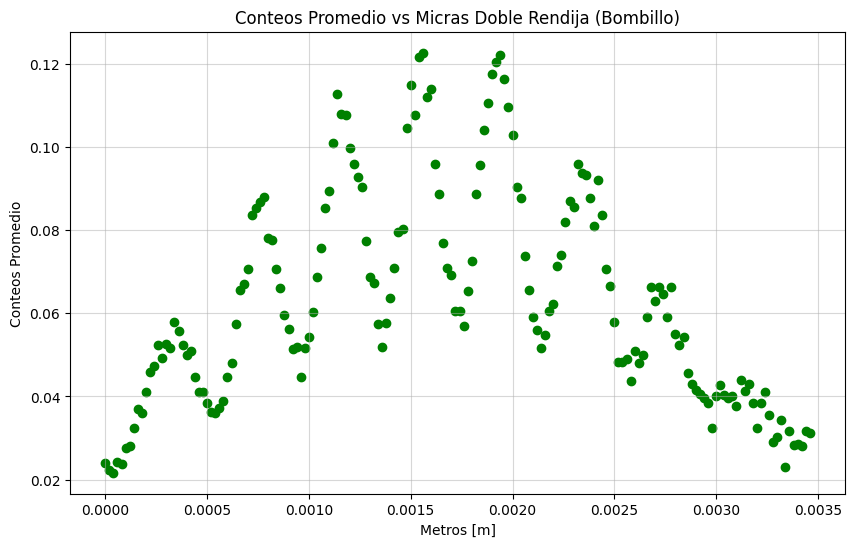

In [20]:
X_data = bombillo_doble["x (+- 10 mu m )"].to_numpy() * 1e-6
Y_data = bombillo_doble["promedio"].to_numpy() * 1e-3
plt.figure(figsize=(10, 6))
plt.scatter(X_data, Y_data, color='green', label='Doble Rendija')
plt.title('Conteos Promedio vs Micras Doble Rendija (Bombillo)')
plt.xlabel('Metros [m]')
plt.ylabel('Conteos Promedio')
plt.grid(alpha=0.5)
plt.show()

In [8]:
x_pico_max = X_data[np.argmax(Y_data)]
V_max = Y_data.max()
a = 0.1 * 1e-3
lambda_guess = 620 * 1e-9
d_guess = 0.5 * 1e-3
#C_guess = (a * np.pi) / lambda_guess
#D_guess = (2 * a * np.pi) / (lambda_guess * C_guess)
L = 1

def fraunhofer(x, A, d, lamb):
    theta = (x - x_pico_max) / L
    beta = (np.pi * a * np.sin(theta)) / lamb
    delta = (np.pi * d * np.sin(theta)) / lamb
    sinc = np.where(beta == 0, 1.0, np.sin(beta) / beta)
    return A * (np.cos(delta)**2) * (sinc**2)

initial_guess = [V_max, d_guess, lambda_guess]  # A, d, lambda
popt, pcov = curve_fit(fraunhofer, X_data, Y_data, p0=initial_guess)
popt

C:\Users\PEPE\AppData\Local\Temp\ipykernel_29472\2182343235.py:14: RuntimeWarning: invalid value encountered in divide
  sinc = np.where(beta == 0, 1.0, np.sin(beta) / beta)


array([ 8.82736498e-02, -4.58212187e-05, -3.81298881e-07])

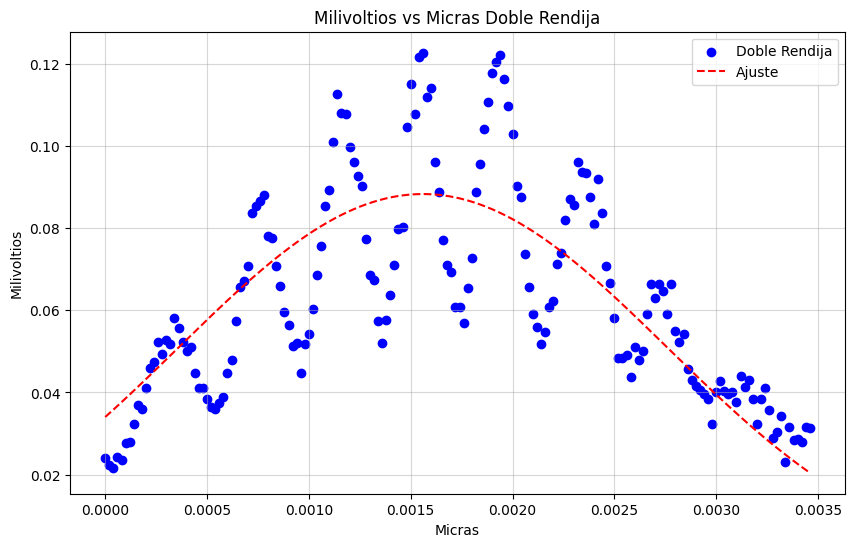

In [9]:
x_model = np.linspace(X_data.min(), X_data.max(), 1000)
y_model = fraunhofer(x_model, *popt)

plt.figure(figsize=(10, 6))
plt.scatter(X_data, Y_data, color='blue', label='Doble Rendija')
plt.plot(x_model, y_model, color='red', label='Ajuste', linestyle='--')
plt.title('Milivoltios vs Micras Doble Rendija')
plt.xlabel('Micras')
plt.ylabel('Milivoltios')
plt.title('Milivoltios vs Micras Doble Rendija')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

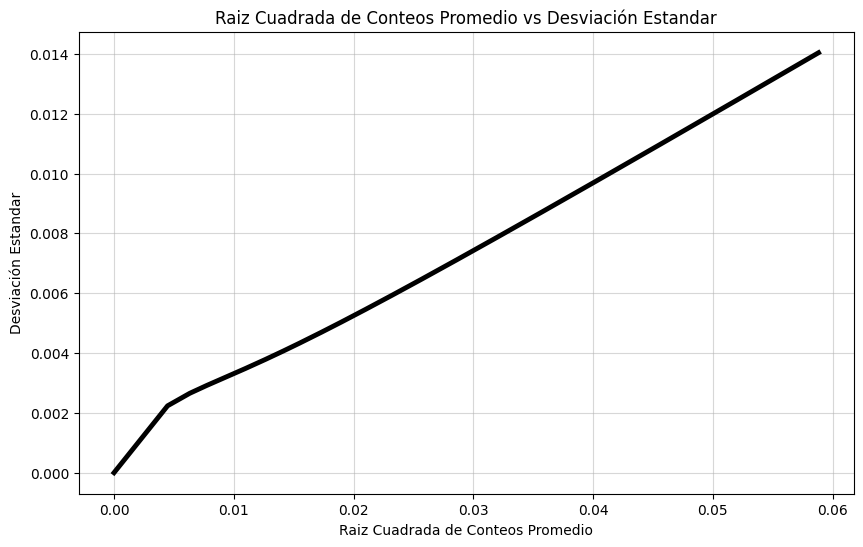

In [19]:
X_data_sqrt = np.sqrt(X_data)
lista = []
desv_lista = []
for i in X_data_sqrt:
    lista.append(i)
    desv_est = np.std(lista)
    desv_lista.append(desv_est)

plt.figure(figsize=(10, 6))
#plt.scatter(X_data, desv_lista, color='blue', label='Doble Rendija')
plt.plot(X_data_sqrt, desv_lista, color='black', label='Doble Rendija', linewidth=3.5)
plt.title('Raiz Cuadrada de Conteos Promedio vs Desviación Estandar')
plt.xlabel('Raiz Cuadrada de Conteos Promedio')
plt.ylabel('Desviación Estandar')
plt.grid(alpha=0.5)
plt.show()